begin
training loss: tensor(33.3070)
accuracy: 0.65
end

begin
training loss: tensor(33.2711)
accuracy: 0.5
end

begin
training loss: tensor(33.2295)
accuracy: 0.75
end

begin
training loss: tensor(32.9738)
accuracy: 0.7
end

begin
training loss: tensor(31.2736)
accuracy: 0.8
end

begin
training loss: tensor(25.4235)
accuracy: 0.85
end

begin
training loss: tensor(23.6532)
accuracy: 0.85
end

begin
training loss: tensor(21.8495)
accuracy: 0.85
end

begin
training loss: tensor(23.4612)
accuracy: 0.8
end

begin
training loss: tensor(22.5924)
accuracy: 0.9
end



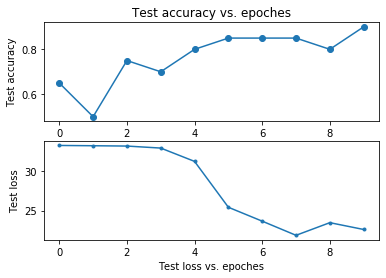

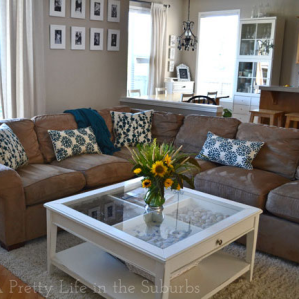

3.111366920302366e-32


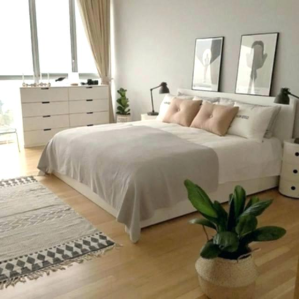

0.0


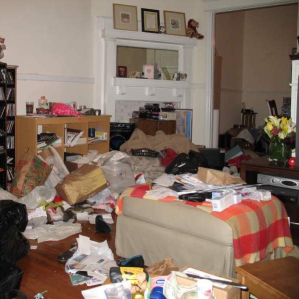

0.0


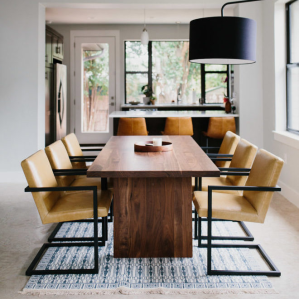

1.0


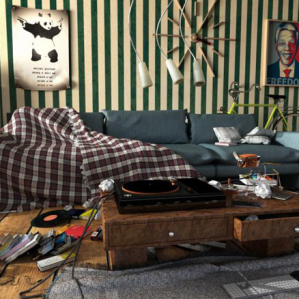

1.0


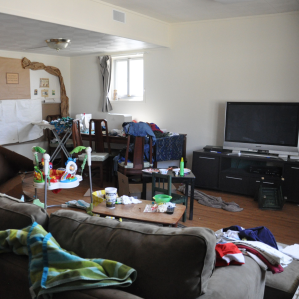

1.0


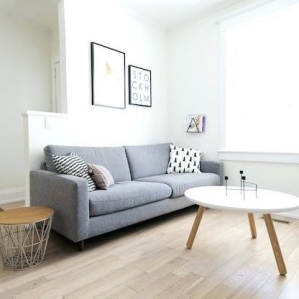

0.0


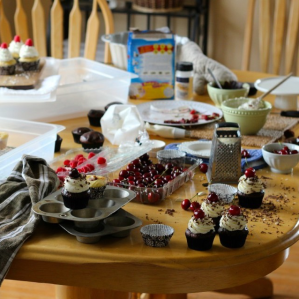

1.0


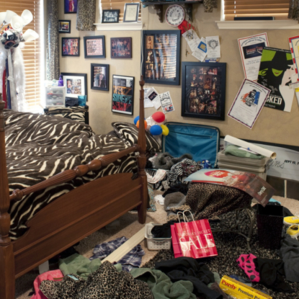

1.0


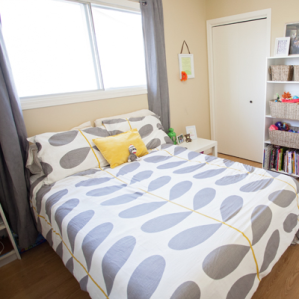

0.0


<Figure size 432x288 with 0 Axes>

In [2]:
import torch
from torch.autograd import Variable
from torch import nn,optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
from skimage import io

# 对数据集进行的变换 224*224
data_transform = transforms.Compose([transforms.Resize((224,224)),transforms.RandomHorizontalFlip(),transforms.ToTensor(),])

# 对于简单的二分类数据集，利用Dataset提供的ImageFolder
# 加载训练集 
# 每个batch 4个数据
# 打乱
# 4线程来做
train_dataset = datasets.ImageFolder(root='C:/Users/10859/Desktop/images/train',transform=data_transform)
train_dataloader = DataLoader(dataset=train_dataset,batch_size=4,shuffle=True,num_workers=4)

# 加载测试集
val_dataset = datasets.ImageFolder(root='C:/Users/10859/Desktop/images/val',transform=data_transform)
val_dataloader = DataLoader(dataset=val_dataset,batch_size=4,shuffle=True,num_workers=4)

# 调用torchvision提供的数据模型 AlexNet
# 分类为二分类问题
model = models.alexnet(pretrained = False,num_classes=2)

# 优化器
# 损失函数
optimizer = optim.Adam(model.parameters(), lr=1e-5)
loss_function = nn.CrossEntropyLoss()

def evalute(model, loader):
    model.eval()
    correct = 0
    total = len(loader.dataset)
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        with torch.no_grad():
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            pred = outputs.argmax(dim=1)
        correct += torch.eq(pred, labels).sum().float().item()
    return (correct / total)

Loss_list = []
Accuracy_list = []

for epoch in range(10):
    print("begin")
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        model.train()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.data
 
    
    print('training loss: ', end='')
    print(running_loss)
    accuracy = evalute(model, val_dataloader)
    print('accuracy: ', end='')
    print(accuracy)
    print("end")
    print("")
    
    Loss_list.append(running_loss)
    Accuracy_list.append(accuracy)
    
x1 = range(0, 10)
x2 = range(0,10)
y1 = Accuracy_list
y2 = Loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Test accuracy vs. epoches')
plt.ylabel('Test accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('Test loss vs. epoches')
plt.ylabel('Test loss')
plt.show()
plt.savefig("accuracy_loss.jpg")

from skimage import io
from PIL import Image

def pred(path):
    torch.no_grad()
    with open(path):
        display(Image.open(path))
    image=io.imread(path)
    image_new = np.transpose(image, (2, 0, 1))
    img = torch.from_numpy(image_new).type(torch.FloatTensor).unsqueeze(0)
    outputs = model(img)
    mark = nn.functional.softmax(outputs[0], dim=0)
    print(float(mark[1]))
    
pred("C:/Users/10859/Desktop/images/test/0.png")
pred("C:/Users/10859/Desktop/images/test/1.png")
pred("C:/Users/10859/Desktop/images/test/2.png")
pred("C:/Users/10859/Desktop/images/test/3.png")
pred("C:/Users/10859/Desktop/images/test/4.png")
pred("C:/Users/10859/Desktop/images/test/5.png")
pred("C:/Users/10859/Desktop/images/test/6.png")
pred("C:/Users/10859/Desktop/images/test/7.png")
pred("C:/Users/10859/Desktop/images/test/8.png")
pred("C:/Users/10859/Desktop/images/test/9.png")